### Import Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

import tensorflow as tf
from keras import layers
from keras.models import Sequential

plt.style.use('dark_background')

In [2]:
plt.rcParams.update({
    "lines.color": "white",
    "patch.edgecolor": "white",
    "text.color": "white",
    "axes.facecolor": "black",
    "axes.edgecolor": "white",
    "axes.labelcolor": "white",
    "xtick.color": "white",
    "ytick.color": "white",
    "grid.color": "grey",
    "figure.facecolor": "black",
    "figure.edgecolor": "black",
    "savefig.facecolor": "black",
    "savefig.edgecolor": "black"})

### Load Dataset

In [3]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data')
df.shape

(302, 14)

In [4]:
df.columns = ['age', 'sex', 'cp', 'trestbps',
        'chol', 'fbs', 'restecg', 'thalach',
        'exang', 'oldpeak', 'slope', 'ca',
        'thal', 'target']

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0


In [6]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
297,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
298,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
299,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
300,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1
301,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


### Exploratory Data Analysis

In [7]:
print(f'Total data : {df.shape[0]}')
print(f'Total attribute : {df.shape[1]}')

Total data : 302
Total attribute : 14


In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.410596,0.678808,3.165563,131.645695,246.738411,0.145695,0.986755,149.605960,0.327815,1.035430,1.596026,0.940397
std,9.040163,0.467709,0.953612,17.612202,51.856829,0.353386,0.994916,22.912959,0.470196,1.160723,0.611939,1.229384
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000
50%,55.500000,1.000000,3.000000,130.000000,241.500000,0.000000,0.500000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [9]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
df.nunique()

age          41
sex           2
cp            4
trestbps     50
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        5
dtype: int64

### Data Visualization

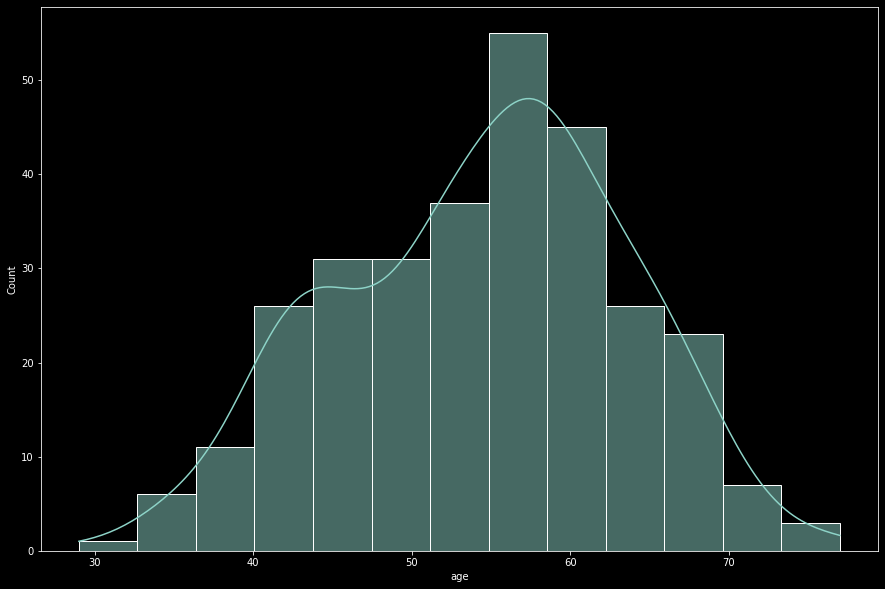

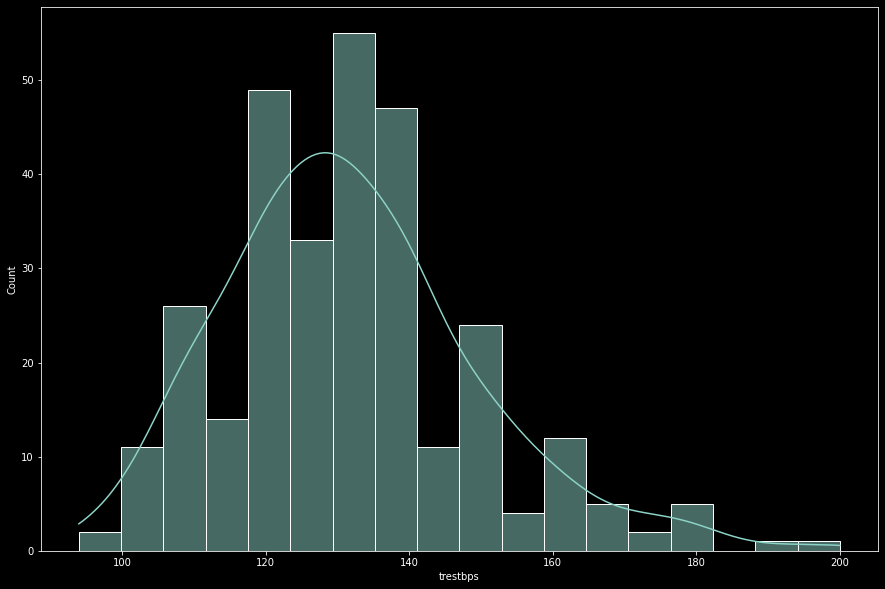

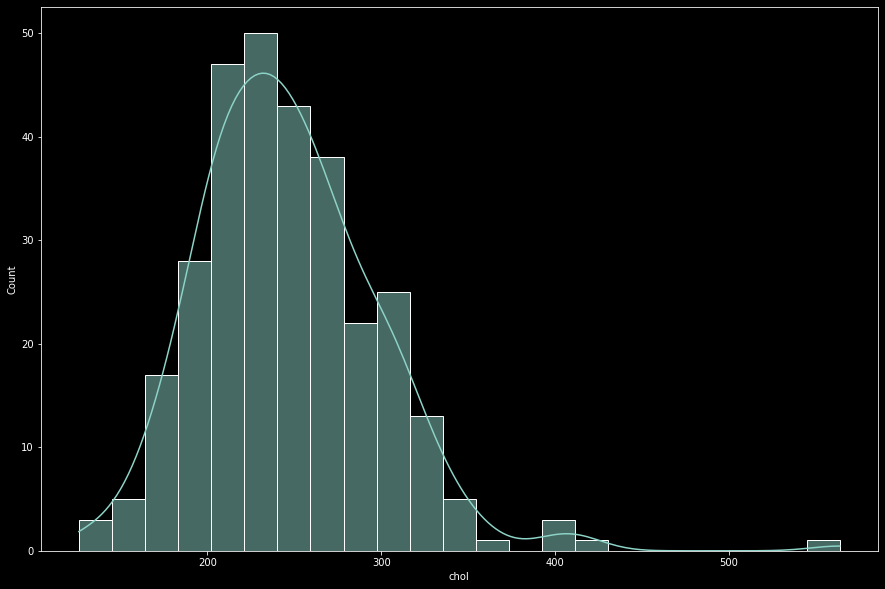

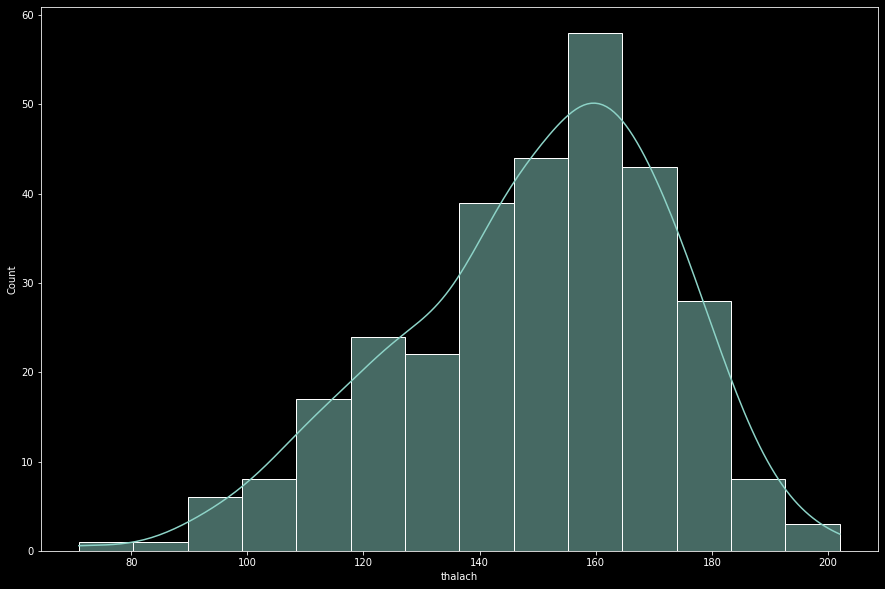

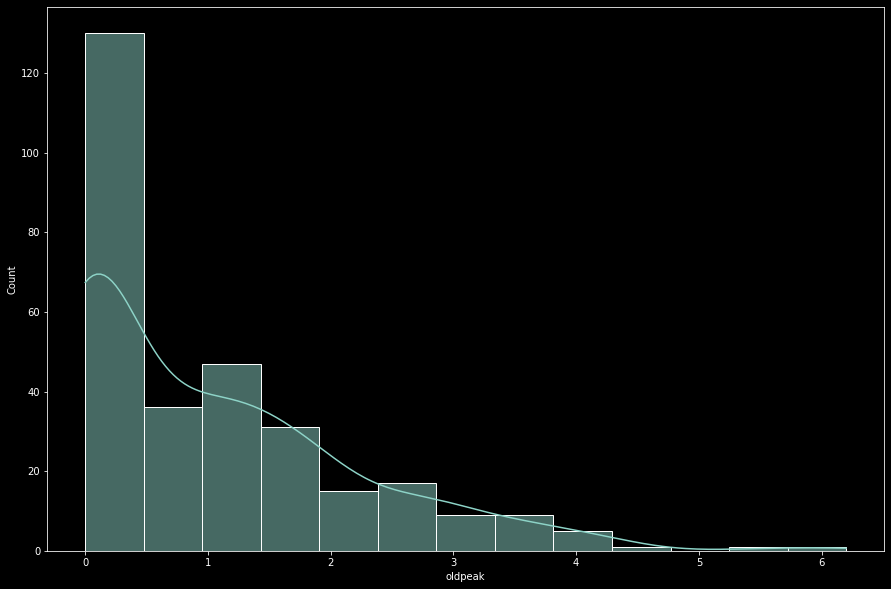

In [12]:
# Distribute data
dist_univariate_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

for column in dist_univariate_columns:
    plt.figure(figsize=(15,10))
    sns.histplot(data=df, x=column,kde=True)
    plt.show()

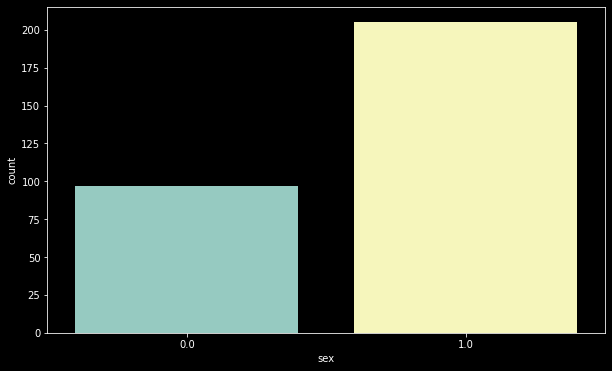

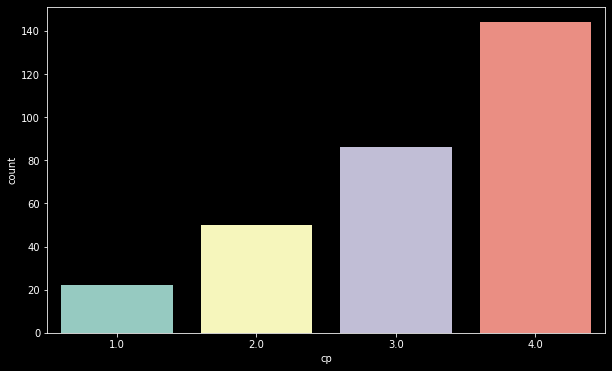

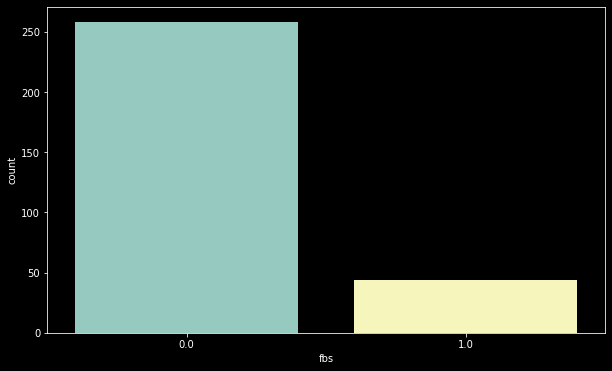

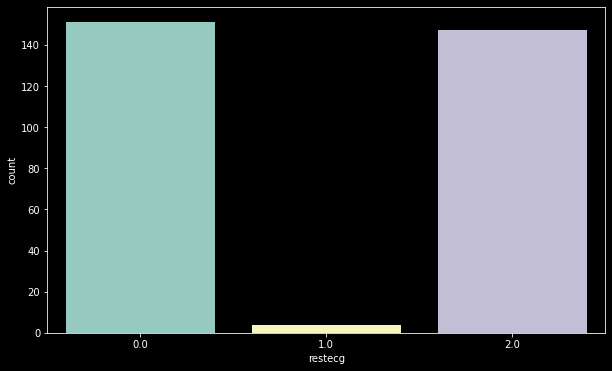

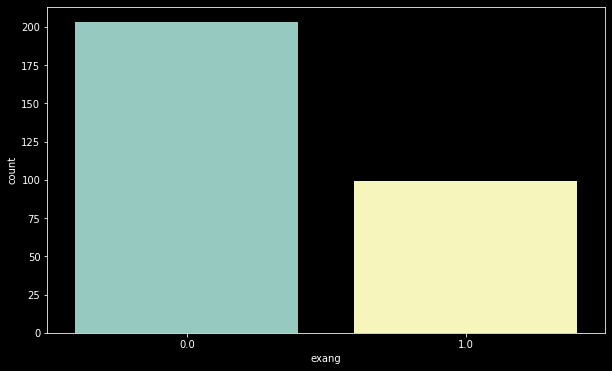

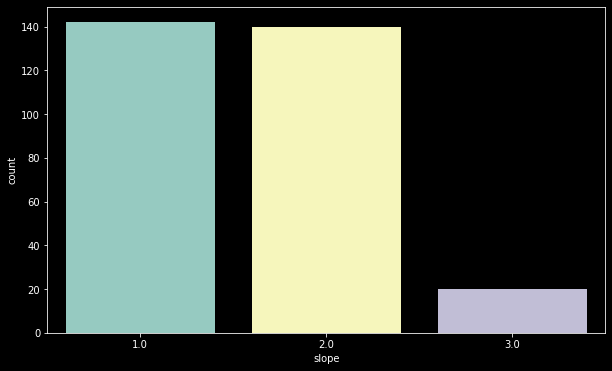

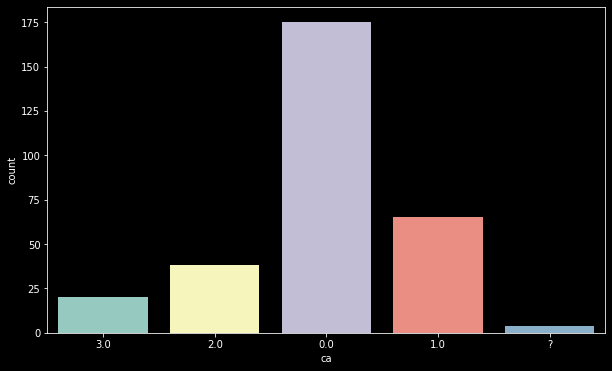

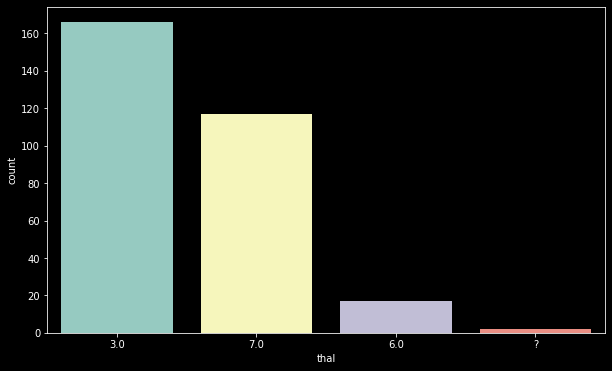

In [14]:
univariate_columns = df.drop(['target','age', 'trestbps', 'chol', 'thalach', 'oldpeak'],axis=1)

for column in univariate_columns:
    plt.figure(figsize=(10,6))
    sns.countplot(data=df, x=column, palette='Set3')
    plt.show()

### Multivariate Analysis

#### By Label

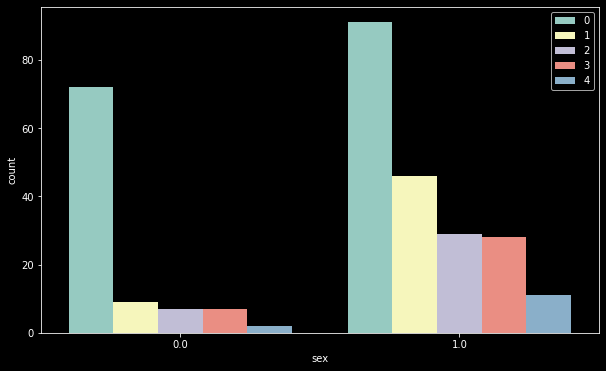

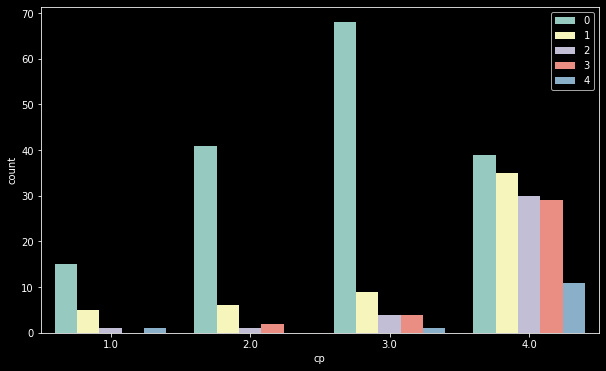

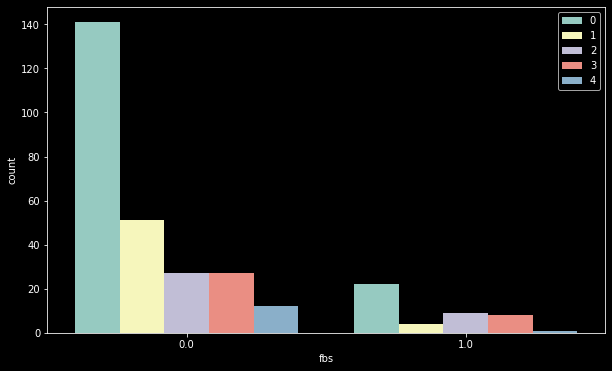

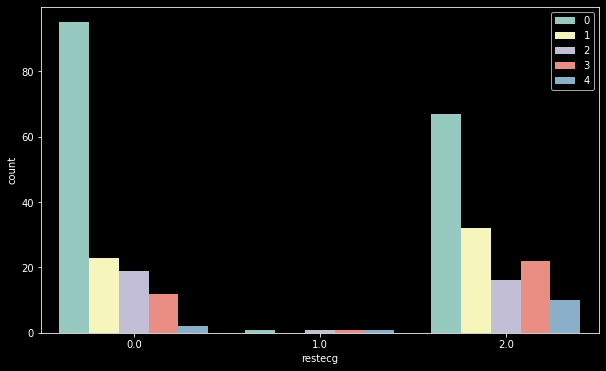

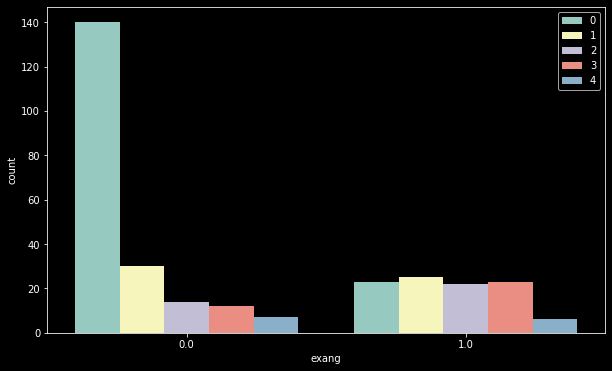

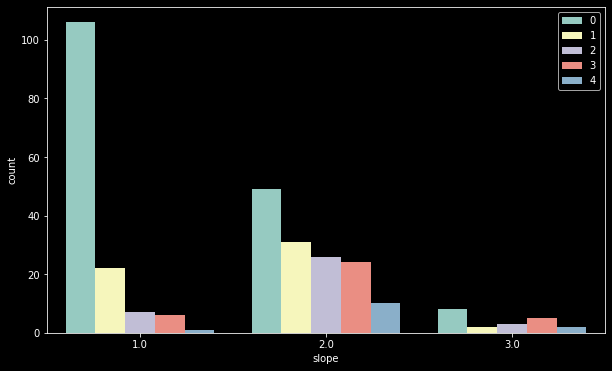

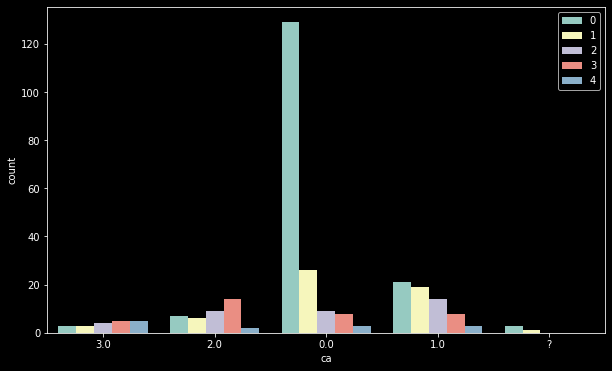

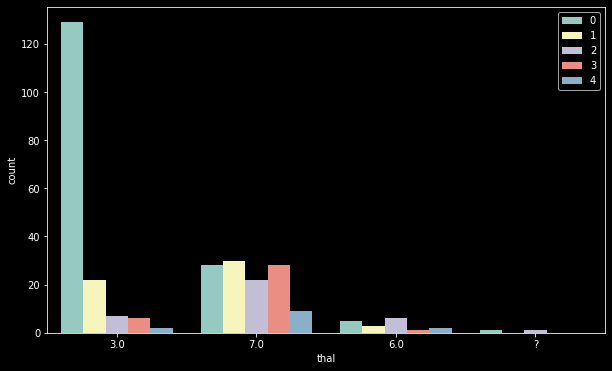

In [15]:
multivariate_columns = df.drop(['target','age', 'trestbps', 'chol', 'thalach', 'oldpeak'],axis=1)

for column in multivariate_columns:
    plt.figure(figsize=(10,6))
    sns.countplot(data=df, x=column, palette='Set3', hue='target')
    plt.legend(loc=1)
    plt.show()

#### By Gender

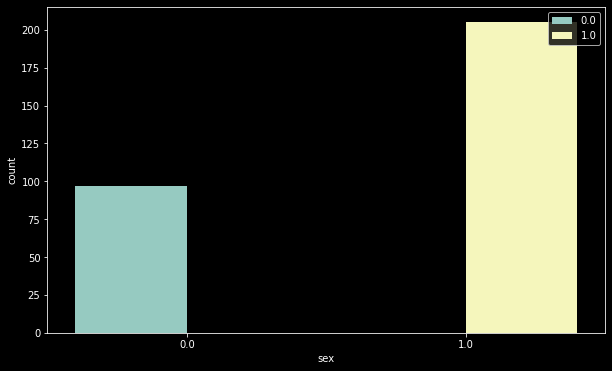

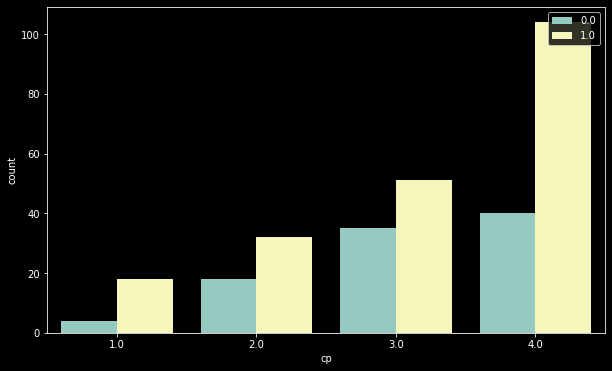

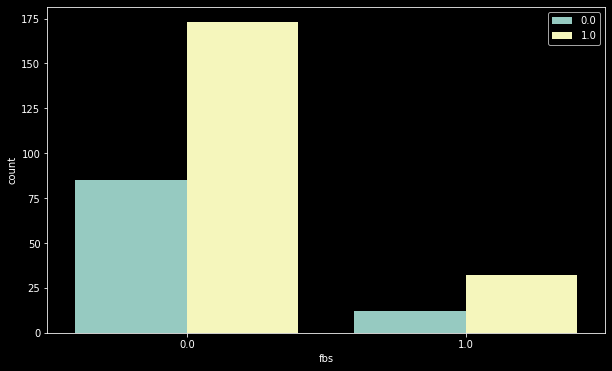

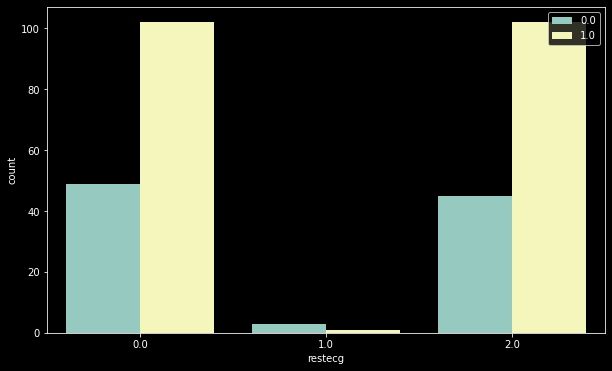

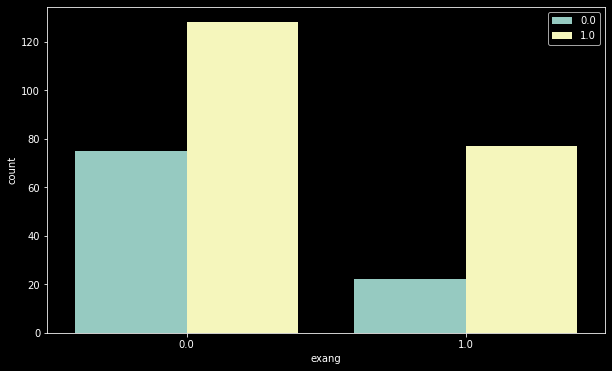

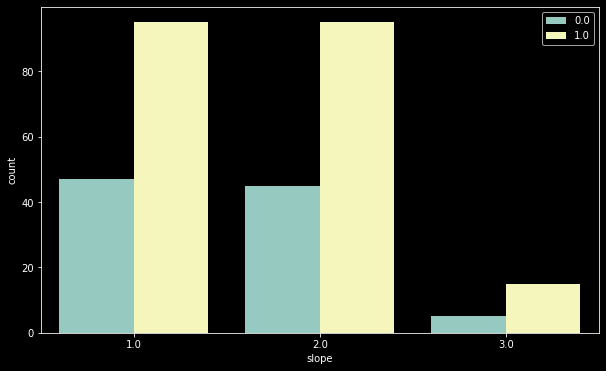

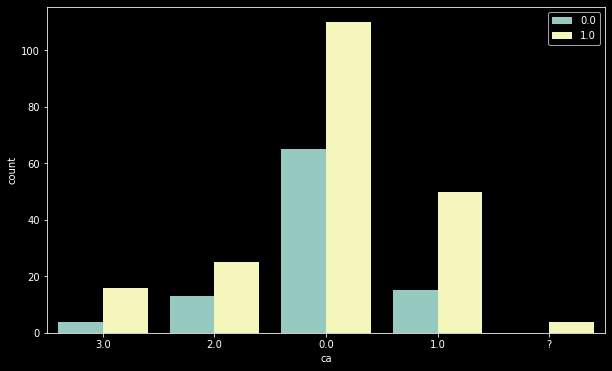

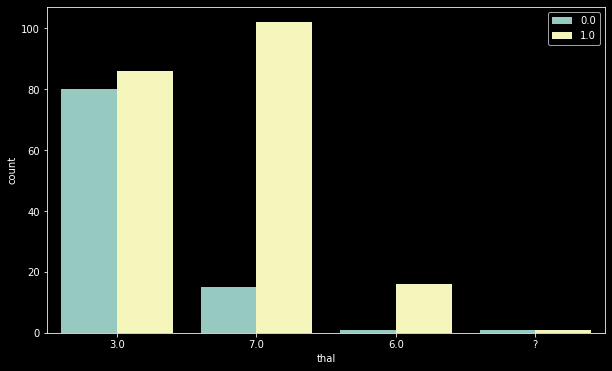

In [16]:
multivariate_columns = df.drop(['target','age', 'trestbps', 'chol', 'thalach', 'oldpeak'],axis=1)

for column in multivariate_columns:
    plt.figure(figsize=(10,6))
    sns.countplot(data=df, x=column, hue='sex')
    plt.legend(loc=1)
    plt.show()

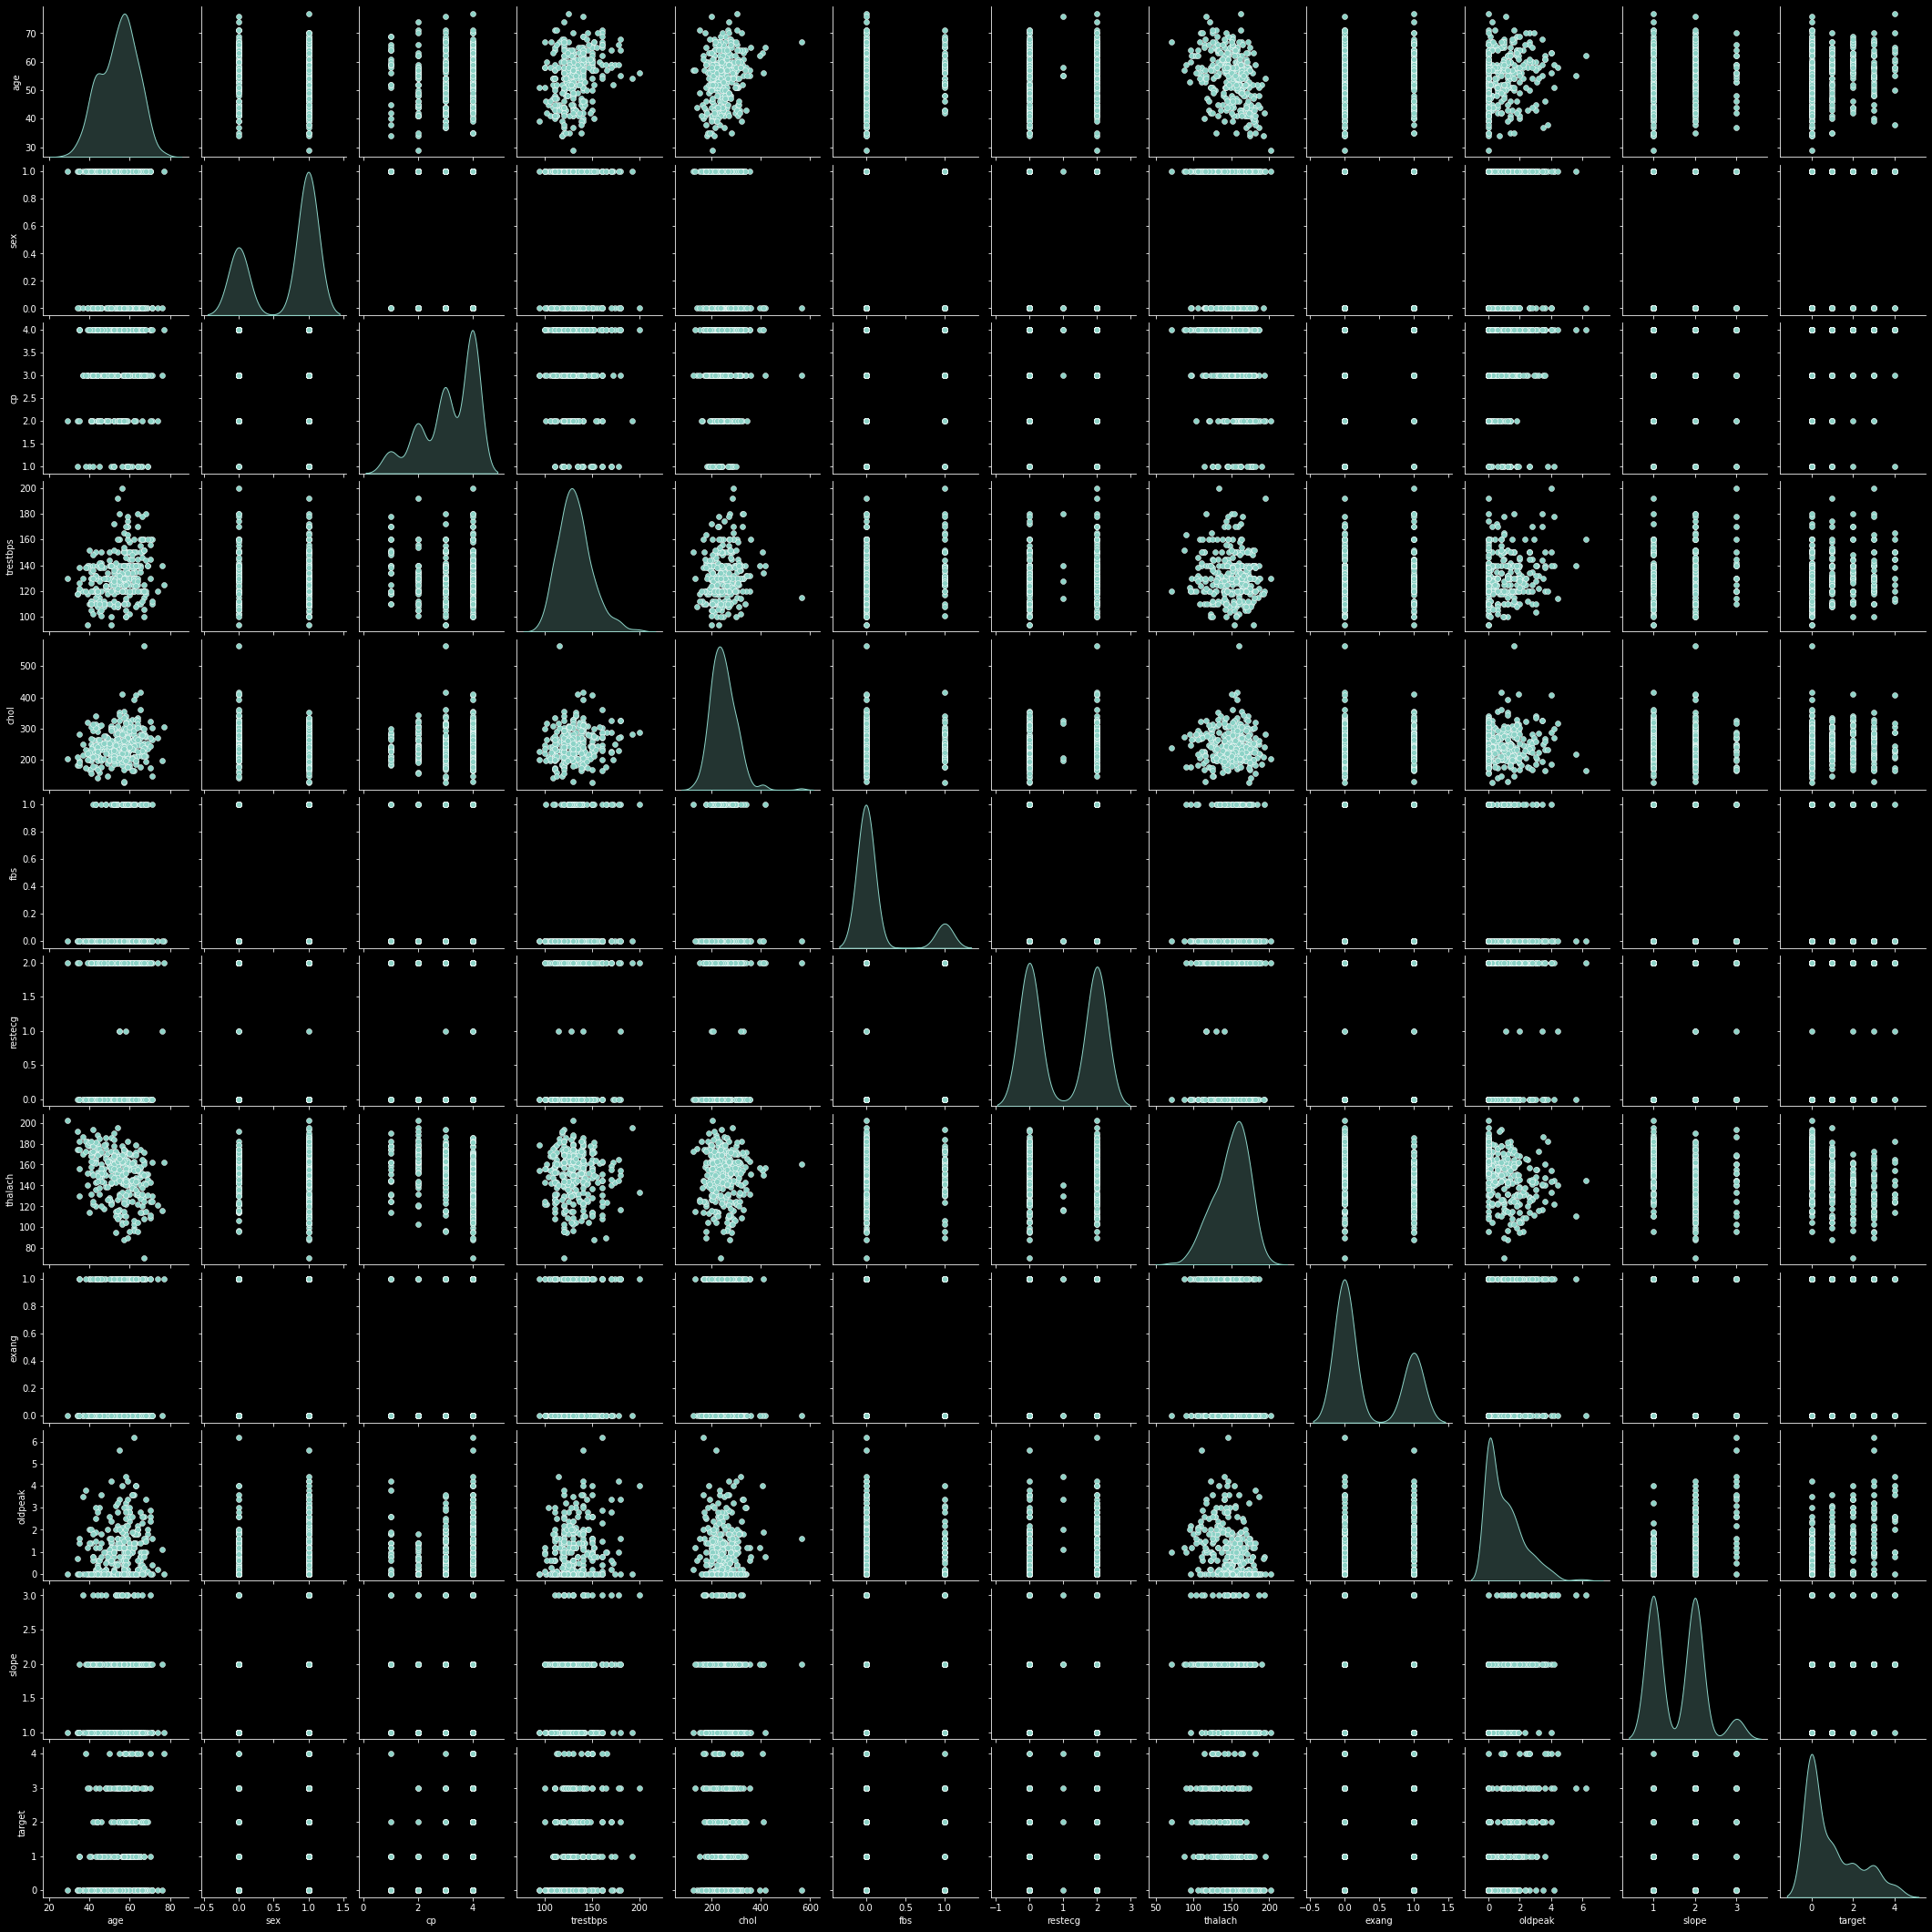

In [17]:
sns.pairplot(data=df, diag_kind='kde')
plt.show()

### Label Visualization

In [18]:
targets = df.target.value_counts()

print('---Value Target---')
print(f'Total data : {targets.sum()}')

print('\nList Data')
for i in range(len(targets)):
    print(f'Value {i} : {df.target.value_counts()[i]}')

---Value Target---
Total data : 302

List Data
Value 0 : 163
Value 1 : 55
Value 2 : 36
Value 3 : 35
Value 4 : 13


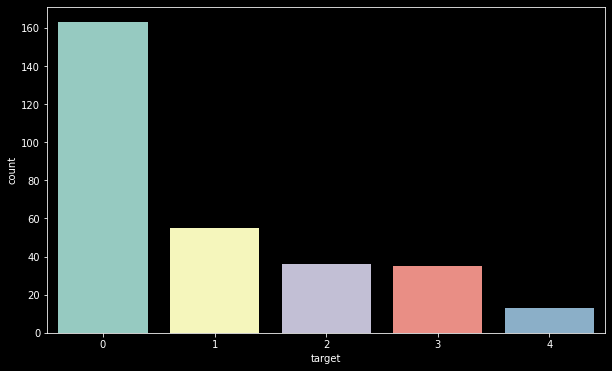

In [20]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='target')
plt.show()

### Data Preparation

#### Delete Symbol Value

In [21]:
df = df[df != '?']
df.dropna(axis=0, inplace=True)

In [22]:
df.shape

(296, 14)

#### Change Data Type

In [23]:
df_column = {'ca' : float,
            'thal' : float}

df = df.astype(df_column)

#### Feature Selection

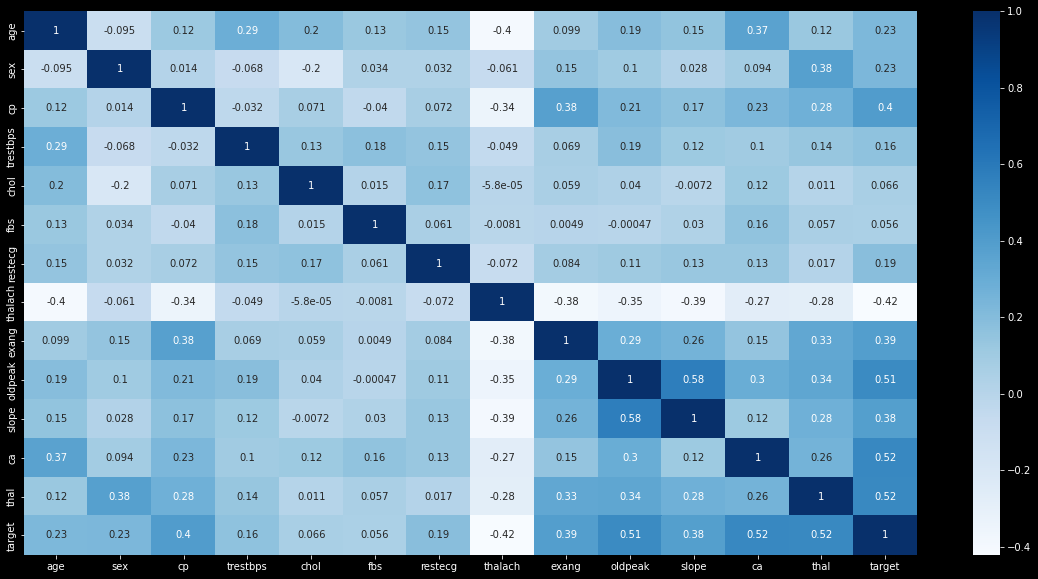

In [24]:
plt.figure(figsize=(20,10))
sns.heatmap(data=df.corr(), annot=True, cmap='Blues')
plt.show()

In [25]:
feature = df.drop('target', axis=1)
label = df['target']

In [26]:
corr = df.corr()

feature_corr = abs(df.corr()['target']).sort_values(ascending=False)
feature_corr

target      1.000000
ca          0.520282
thal        0.515967
oldpeak     0.505713
thalach     0.421013
cp          0.402260
exang       0.390516
slope       0.384283
sex         0.229002
age         0.225141
restecg     0.187266
trestbps    0.161882
chol        0.065805
fbs         0.055959
Name: target, dtype: float64

In [27]:
feature = feature.drop(['fbs', 'chol', 'trestbps', 'restecg'], axis=1)

In [28]:
feature

,age,sex,cp,thalach,exang,oldpeak,slope,ca,thal
0,67.0,1.0,4.0,108.0,1.0,1.5,2.0,3.0,3.0
1,67.0,1.0,4.0,129.0,1.0,2.6,2.0,2.0,7.0
2,37.0,1.0,3.0,187.0,0.0,3.5,3.0,0.0,3.0
3,41.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0
4,56.0,1.0,2.0,178.0,0.0,0.8,1.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...
296,57.0,0.0,4.0,123.0,1.0,0.2,2.0,0.0,7.0
297,45.0,1.0,1.0,132.0,0.0,1.2,2.0,0.0,7.0
298,68.0,1.0,4.0,141.0,0.0,3.4,2.0,2.0,7.0
299,57.0,1.0,4.0,115.0,1.0,1.2,2.0,1.0,7.0


### Split dataset

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(feature, label, test_size=0.2, random_state=2)

In [30]:
print(f'Total Training feature data : {X_train.shape[0]}')
print(f'Total Training label data : {y_train.shape[0]}')

Total Training feature data : 236
Total Training label data : 236


### Build the model

#### Experiment with Epoch

In [31]:
def fit_first_model(x_train, y_train, x_test, y_test, epoch):
    
    # define model
    model = Sequential()
    model.add(layers.Dense(32, input_dim=9, activation='relu'))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(5, activation='softmax'))
    
    # compile model
    model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
    
    # fit model
    history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epoch, verbose=0)
    
    # plot learning curves
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.title('epoch='+str(epoch))
    plt.legend()

In [32]:
epoch = [50, 100, 150, 200, 250, 300, 350, 400]

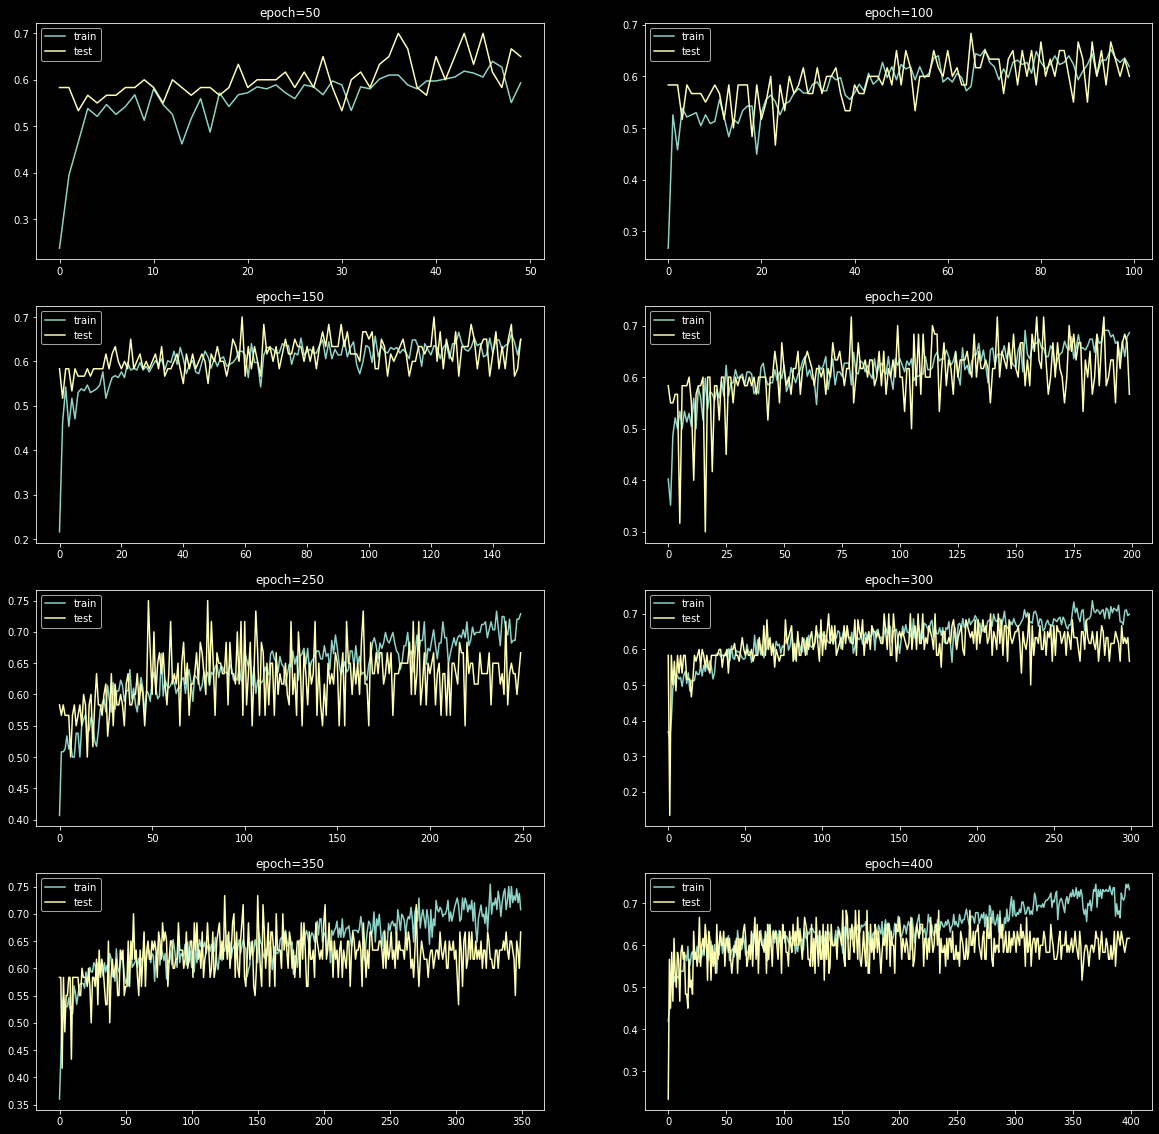

In [33]:
plt.figure(figsize=(20, 20))
for i in range(len(epoch)):
    
    # determine the plot number
    plot_no = 420 + (i+1)
    plt.subplot(plot_no)
    
    # fit model and plot learning curves for a learning rate
    fit_first_model(X_train, y_train, X_test, y_test, epoch[i])

# show learning curves
plt.show()

### Conclusion 
Dari grafik dapat disimpulkan bahwa :
1. Semakin besar epoch tidak membuat model menjadi lebih baik, terlihat pada rentang epoch 200-400 bahwa `spike` semakin banyak dan bahkan jarak antara akurasi train dan test semakin jauh berbeda. Ini bisa sebagai indikasi bahwa model overfitting
2. Model terlihat bagus bahkan sejak di range epoch antara 50-150 bisa dilihat bahwa perbedaan antara akurasi data train dan test tidak terlalu memiliki jarak yang berbeda
3. Saya akan menggunakan epoch 100

#### Experiment with Batch Size

In [37]:
def fit_first_model(x_train, y_train, x_test, y_test, batch):
    
    # define model
    model = Sequential()
    model.add(layers.Dense(32, input_dim=9, activation='relu'))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(5, activation='softmax'))
    
    # compile model
    model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
    
    # fit model
    epoch = 100
    history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epoch, batch_size=batch, verbose=0)
    
    # plot learning curves
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.title('batch_size='+str(batch))
    plt.legend()

In [38]:
batchs = [1, 4, 8, 16, 32, 64, 128, 256]

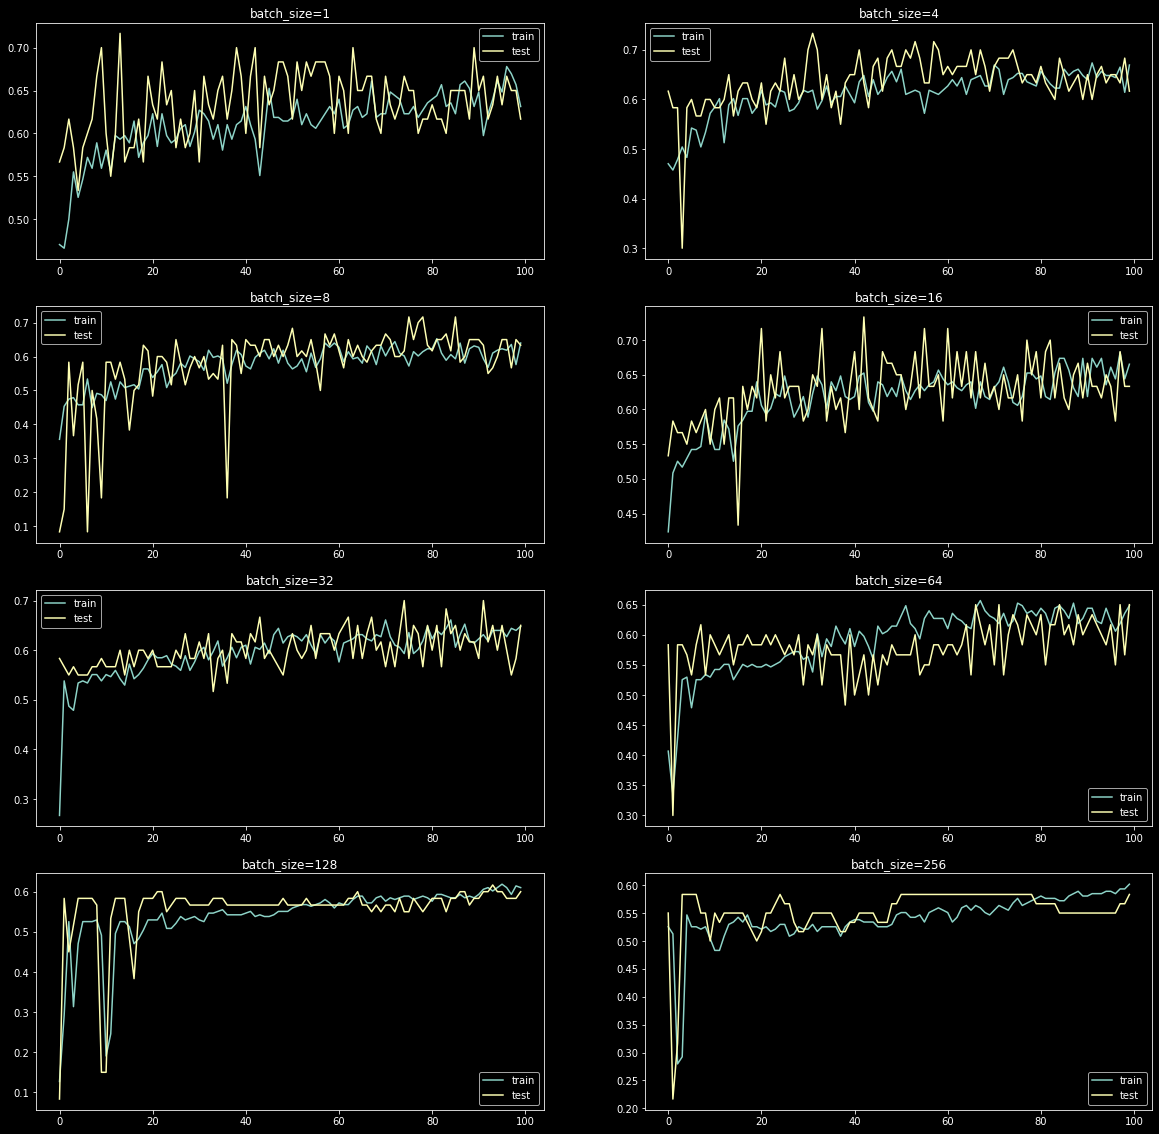

In [39]:
plt.figure(figsize=(20, 20))
for i in range(len(batchs)):
    
    # determine the plot number
    plot_no = 420 + (i+1)
    plt.subplot(plot_no)
    
    # fit model and plot learning curves for a learning rate
    fit_first_model(X_train, y_train, X_test, y_test, batchs[i])

# show learning curves
plt.show()

### Conclusion
Dari grafik dapat disimpulkan bahwa :
1. Semua batch size tidak terlalu jauh perbedaannya
4. Saya akan menggunakan batch size 128

### Experiment with Learning Rate

In [40]:
def fit_first_model(x_train, y_train, x_test, y_test, lr):
    
    # define model
    model = Sequential()
    model.add(layers.Dense(32, input_dim=9, activation='relu'))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(5, activation='softmax'))
    
    # compile model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = lr),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
    
    # fit model
    epoch = 100
    batch = 128
    history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epoch, batch_size=batch, verbose=0)
    
    # plot learning curves
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.title('learning_rate='+str(lr))
    plt.legend()

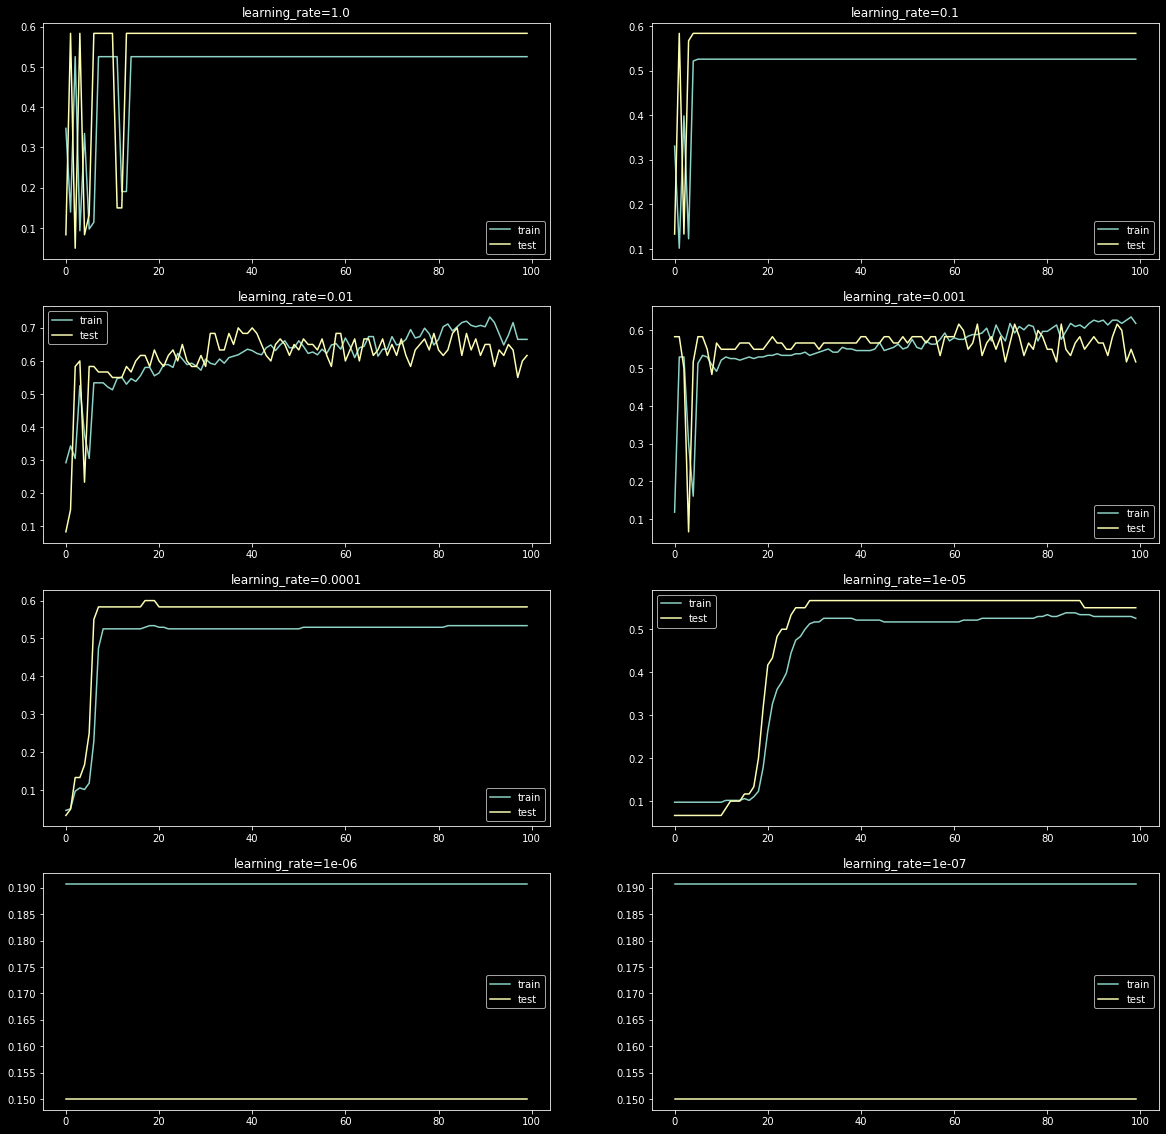

In [41]:
learning_rates = [1E-0, 1E-1, 1E-2, 1E-3, 1E-4, 1E-5, 1E-6, 1E-7] # use learning rate values between 0.0 to 1.0

plt.figure(figsize=(20, 20))
for i in range(len(learning_rates)):
    
    # determine the plot number
    plot_no = 420 + (i+1)
    plt.subplot(plot_no)
    
    # fit model and plot learning curves for a learning rate
    fit_first_model(X_train, y_train, X_test, y_test, learning_rates[i])

# show learning curves
plt.show()

### Conclusion
Dari grafik dapat disimpulkan bahwa :
1. Semakin kecil learning rate antara 0.0001 sampai terakhir membuat model memiliki jarak yang lumayan jauh antara data train dan data test
2. Begitu pula learning rate 1 juga memiliki jarak yang jauh
3. Learning yang optimal antara 0.01 dan 0.001
4. Saya akan menggunakan learning rate 0.01

### Final Model

In [42]:
model = Sequential([
    layers.Dense(units=32, input_dim=9, activation='relu'),
    layers.Dense(units=32, activation='relu'),
    layers.Dense(units=64, activation='relu'),
    layers.Dense(units=128, activation='relu'),
    layers.Dense(units=5, activation='softmax')
])

In [43]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [44]:
epochs = 100
batchs = 128
history = model.fit(
  X_train,y_train,
  validation_data=(X_test,y_test),
  epochs=epochs,
  batch_size=batchs
)

Epoch 1/100
2/2 [==============================] - 1s 419ms/step - loss: 8.5783 - accuracy: 0.1568 - val_loss: 7.7853 - val_accuracy: 0.5833
Epoch 2/100
2/2 [==============================] - 0s 61ms/step - loss: 8.2796 - accuracy: 0.5254 - val_loss: 5.3358 - val_accuracy: 0.2000
Epoch 3/100
2/2 [==============================] - 0s 54ms/step - loss: 5.3441 - accuracy: 0.2119 - val_loss: 2.1674 - val_accuracy: 0.5667
Epoch 4/100
2/2 [==============================] - 0s 54ms/step - loss: 2.3924 - accuracy: 0.5254 - val_loss: 1.5181 - val_accuracy: 0.5833
Epoch 5/100
2/2 [==============================] - 0s 30ms/step - loss: 1.5630 - accuracy: 0.5254 - val_loss: 1.2854 - val_accuracy: 0.5833
Epoch 6/100
2/2 [==============================] - 0s 29ms/step - loss: 1.2895 - accuracy: 0.5254 - val_loss: 1.2957 - val_accuracy: 0.5500
Epoch 7/100
2/2 [==============================] - 0s 34ms/step - loss: 1.2577 - accuracy: 0.5339 - val_loss: 1.2764 - val_accuracy: 0.5833
Epoch 8/100
2/2 [==

### Model Evaluation

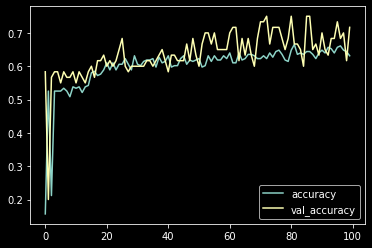

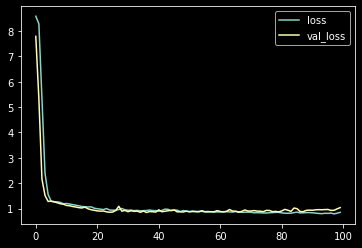

In [45]:
import pandas as pd

evaluation = pd.DataFrame(model.history.history)
evaluation[['accuracy', 'val_accuracy']].plot()
evaluation[['loss', 'val_loss']].plot()

In [46]:
# evaluate the model
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, valid_acc = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Valid: %.3f' % (train_acc, valid_acc))

Train: 0.636, Valid: 0.717
